# Project 3: Investigate a Data Set [tmdb_movies.csv]


# Table of Contents

•	Introduction

•	Data Wrangling

•	Exploratory Data Analysis (EDA)

•	Conclusions


# Introduction

This TMDb movies data set which is a CSV file contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. (copied from the information on data set options).

There are 20 columns in the data set and which provides the following important information:

popularity; this tells us how popular each particular movie is
budget which is a projection of movie expenses
revenue; which shows money generated from movie release  
profit; this shows how funds actualized after excluding the budget from the revenue

and many others.....



# Questions for Analysis

Q1. Which year has the most number of movie releases?

Q2. Which genres are most popular from year to year?

Q3. What is the correlation between attributes of the dataset?

Q4. Which Movie has the highest revenue, does the movie also have the highest budget??

Q5. Q5. What is the average runtime for the movies in the dataset? Has this changed over the decades?

Q6. Has the vote count fo movies increased over the years?



# Importing Various Python libraries and importing the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Data Wrangling

This is to check for cleanliness, trim and clean the data in order to give a detailed report

# General Properties of the Dataset

In [ ]:
#load the data and call up the topmost part of the dataset
# Perform operations to inspect datatypes Nand look for missing values or errant data
df = pd.read_csv('tmdb_movies.csv')
df.head()

In [91]:
# this shows the dimensions of the dataframe or the shape of the data 
df.shape

(10866, 21)

The data consists of 10866 rows and 21 columns

In [92]:
df.describe()
#this returns useful descriptive statistics for each column of data
#this gives us the count, mean, standard deviation, least value, maximum value, and percentile positions across the numerical data in the dataset

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the descriptive data above, the average revenue generated is 3.982690e+07, the maximum revenue generated is 2.781506e+09. Again the average movie runtime is 102.071790.

In [93]:
df.info()
# this displays a summary dataframe
# including the number of non-null values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

This gives a concise summary of the dataframe. There are however some missing non-numeric data in the dataframe which will be eliminated in order to give a comprehensive picture of the dataframe. 

# Cleaning the Data

In [94]:
df.drop(['imdb_id', 'tagline', 'overview', 'homepage', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   keywords              9373 non-null   object 
 8   runtime               10866 non-null  int64  
 9   genres                10843 non-null  object 
 10  production_companies  9836 non-null   object 
 11  release_date          10866 non-null  object 
 12  vote_count            10866 non-null  int64  
 13  vote_average          10866 non-null  float64
 14  release_year          10866 non-null  int64  
dtypes: float64(2), int6

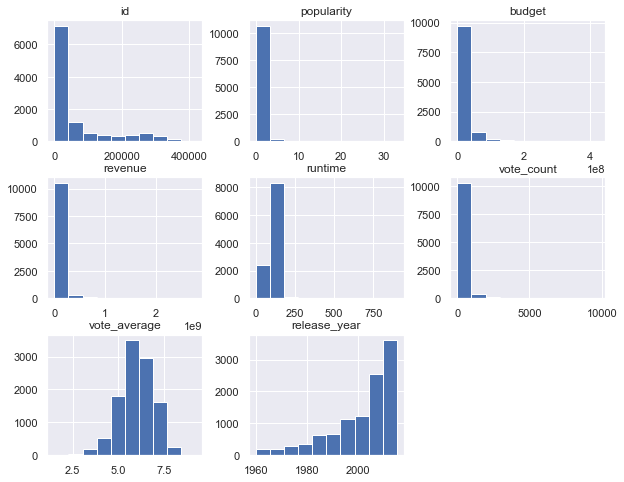

In [95]:
df.info()
df.hist(figsize=(10,8));

In [96]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8667 non-null   int64  
 1   popularity            8667 non-null   float64
 2   budget                8667 non-null   int64  
 3   revenue               8667 non-null   int64  
 4   original_title        8667 non-null   object 
 5   cast                  8667 non-null   object 
 6   director              8667 non-null   object 
 7   keywords              8667 non-null   object 
 8   runtime               8667 non-null   int64  
 9   genres                8667 non-null   object 
 10  production_companies  8667 non-null   object 
 11  release_date          8667 non-null   object 
 12  vote_count            8667 non-null   int64  
 13  vote_average          8667 non-null   float64
 14  release_year          8667 non-null   int64  
dtypes: float64(2), int64

# Data Wrangling Summary

After gathering the data from the CSV file, we explored the general properties of the dataset, showed the dimensions of the data, 
the descriptive statistics for the data and a summary of the information in the dataset. 
Then we cleaned the data by dropping NAN values and other 6 columns not needed  for our analysis 

# Data Exploration and Visualization
We have to create functions which will aid solutions to questions and improve the EDA process before we visualize the data

In [97]:
 def get_min_max(col_name):
    #we use the idxmin() and idxmax() funtions to find the min and max values of the given column
    #idxmin to find the lowest index in a give col_name 
    min_index = df[col_name].idxmin()
    #idxmax to find the lowest index in a give col_name
    max_index = df[col_name].idxmax()
    #to select the lowest and highest value from a given col_name
    low = pd.DataFrame(df.loc[min_index,:])
    high = pd.DataFrame(df.loc[min_index,:])
    #to print the results
    print('Movie which has the highest '+col_name+' : ', df['original_title'][max_index])
    print('Movie which has the lowest '+col_name+' : ', df['original_title'][min_index])
    return pd.concat([high,low], axis=1)

We use this function above to call up the highest and lowest value for any given column data in the dataset

In [98]:
def top_ten(col_name,size=10):
    #find the all times top 10 values for any given column
    #sort the column to select the top ten
    df_sorted = pd.DataFrame(df[col_name].sort_values(ascending=False))[:size]
    df_sorted['original_title'] = df['original_title']
    
    #to calculate the average
    avg = np.mean(df[col_name])
    sns.barplot(x=col_name, y='original_title', data=df_sorted, label=col_name)
    plt.axvline(avg, color='k', linestyle='--', label='mean')
    if (col_name == 'profit' or col_name == 'budget' or col_name == 'revenue'):
        plt.xlabel(col_name.capitalize() + '(USD)')
    else:
        plt.xlabel(col_name.capitalize())
    plt.ylabel('')
    plt.title('Top Ten Movies in: ' + col_name.capitalize())
    plt.legend


The function above is used to call up the top 10 movies for any given column and also plot it in a bar chart

# Q1. Which Year has the Most Number of Movie Releases?, What month in this year has the most movie releases?

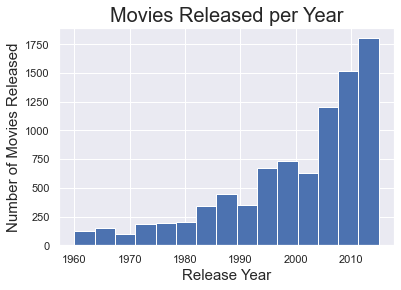

In [99]:
plt.hist(df['release_year'], bins = 15)
plt.title('Movies Released per Year', fontsize = 20)
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Number of Movies Released', fontsize = 15)
plt.show()

This is a histogram of the year with the highest movie release recorded after 2010. To get a better visualization, we will plot the data by month and by year

<AxesSubplot:>

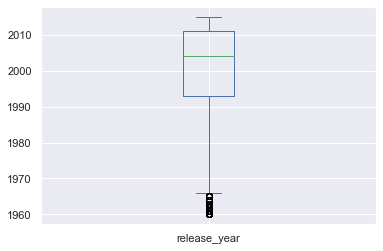

In [101]:
df['release_year'].plot(kind='box')

This shows the movies released by year in a box plot 

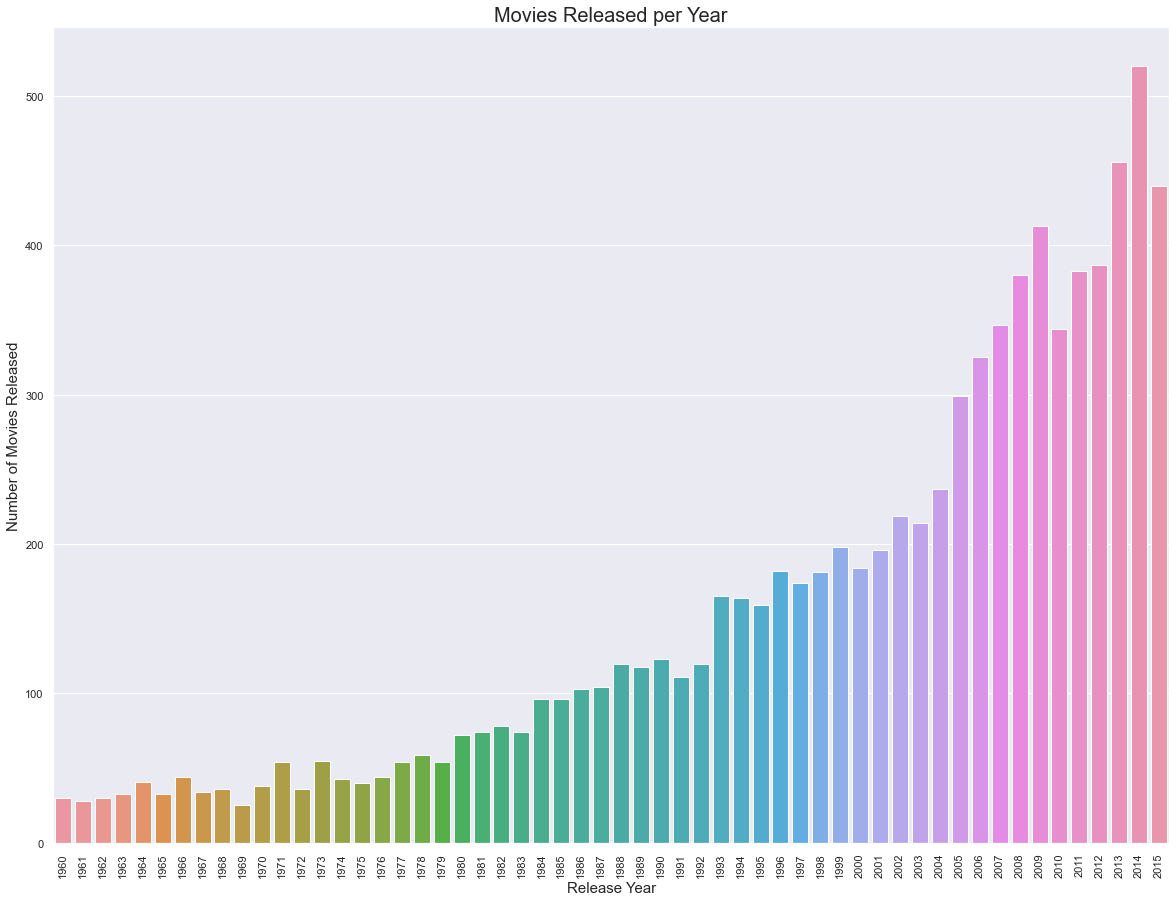

In [102]:
#visualing the data
plt.figure (figsize=(20,15))
sns.countplot(df['release_year'])
plt.title('Movies Released per Year', fontsize = 20)
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Number of Movies Released', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

From the above graph, we can see that the year 2014 recorded the highest number of movie releases.

In [103]:
print("In 2014, {} movies were released.".format(df['release_year'][df['release_year']==2014].count()))

In 2014, 520 movies were released.


The release of movies have doubled since 2005.

In [104]:
# to call up the month with the highest movie releases, we need to convert the release date column to datetime
df['release_date']=pd.to_datetime(df['release_date'])

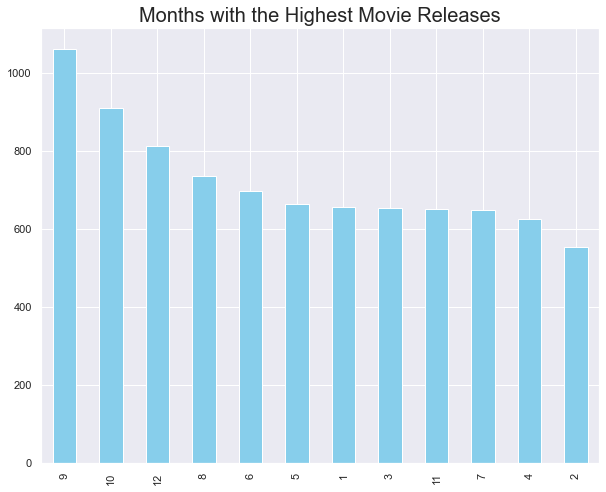

In [105]:
#this displays the month with the highest movie relases in a bar chart as seen below
plt.figure(figsize=(10,8))
df['release_date'].dt.month.value_counts().plot.bar(color='skyblue')
plt.title('Months with the Highest Movie Releases', fontsize = 20)
plt.show()

In [ ]:
This shows that the month September had the highest number of movies released with a count of over 1000 movies released and February is the month with the lowest movie release count showing half of the count rreleased in September.

# Q2. Which genres are most popular from year to year?

In [106]:
genre = df['genres'].str.get_dummies(sep='|')
#this is used to convert the data to strings

In [107]:
genre1 = genre.sum().reset_index()

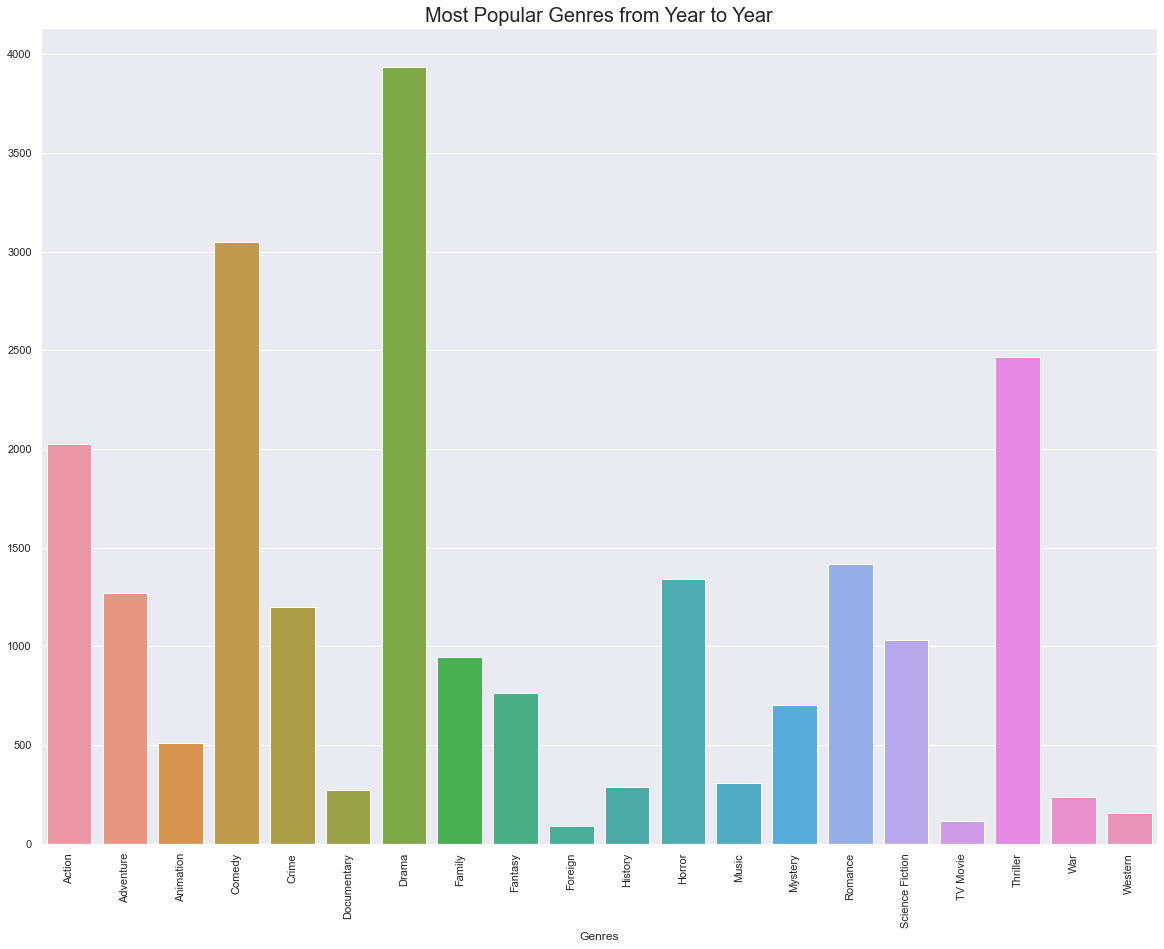

In [108]:
plt.figure(figsize=(20,15))
sns.barplot(x=genre.columns, y=genre.sum(), data = genre1)
plt.title('Most Popular Genres from Year to Year', fontsize = 20)
plt.xlabel('Genres')
plt.ylabel('')
plt.xticks(rotation = 90)
plt.show()

From the bar graph above, Action, Comedy, Drama and Thriller are said to be the most popular movies genres from year to year, this also influenced the popularity of the movie as well as the revenue generated from these movie categories as seen below.

In [ ]:
sns.displot(x='revenue', hue='genres', data=df)

# Q3. What is the correlation between attributes of the dataset?

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
id,1.000000,0.030784,-0.116652,-0.079766,-0.095256,-0.005832,-0.070960,0.495230
popularity,0.030784,1.000000,0.533149,0.659153,0.164401,0.801427,0.244907,0.137012
budget,-0.116652,0.533149,1.000000,0.729316,0.227947,0.624880,0.089705,0.170190
revenue,-0.079766,0.659153,0.729316,1.000000,0.195129,0.786645,0.194411,0.095476
runtime,-0.095256,0.164401,0.227947,0.195129,1.000000,0.197071,0.203486,-0.128110
vote_count,-0.005832,0.801427,0.624880,0.786645,0.197071,1.000000,0.288359,0.149766
vote_average,-0.070960,0.244907,0.089705,0.194411,0.203486,0.288359,1.000000,-0.124153
release_year,0.495230,0.137012,0.170190,0.095476,-0.128110,0.149766,-0.124153,1.000000


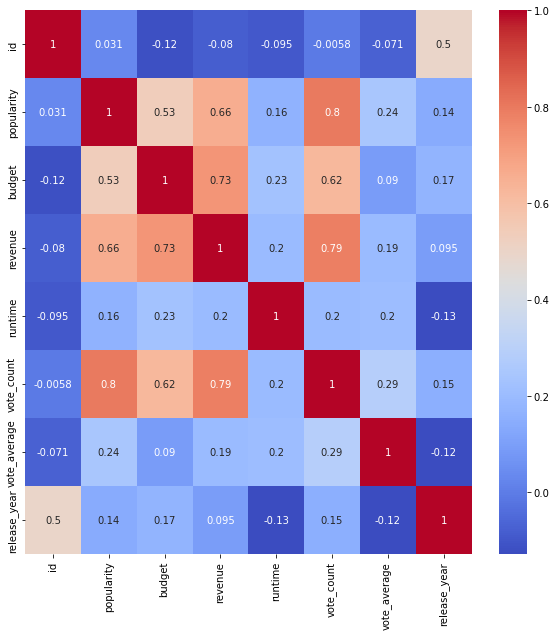

In [50]:
plt.figure(figsize=(10,10))
# r represents revenue
r = df.corr()
sns.heatmap(r, cmap = 'coolwarm', annot=True)
r

The heatmap above shows the following:
    
Popularity has a high correlation with revenue, vote count and release year

Budget has a high correlation with revenue as the budget into making a quality production drives revenue and will also increase profit.

Vote count has a high correlation with popularity, the more vote count a movie will in turn increase its popularity

Release year is also highly correlated with popularity, as trends register an improved quality of movies thereby increasing popularity

# Q4. Which Movie has the highest revenue?, does the movie also have the highest budget?

In [ ]:
get_min_max('revenue')

Avatar is the movie with the highest revenue generated while wildcard has the lowest revenue generated, this hwoever does not mean that Avatar was the most budgeted for.

We will see this in a barplot below.

In [52]:
print(df.original_title[df['revenue']==df['revenue'].max()])

1386    Avatar
Name: original_title, dtype: object


In [ ]:
#representing the  result above graphically
plt.figure(figsize=(10,8))
hr = df[['original_title', 'revenue']].sort_values('revenue', ascending=False).head(5)
sns.barplot(x='original_title', y='revenue', data=hr, palette='Blues_r')
plt.title('Movie with Highest Revenue', fontsize = 15)
plt.xlabel('Original Title', fontsize = 10)
plt.ylabel('Revenue', + '(USD)'fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

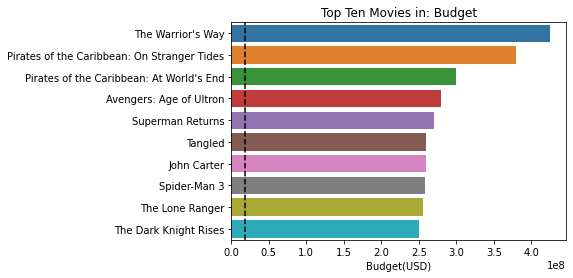

In [54]:
top_ten('budget')

As stated earlier, we can see that although Avatar generated the highest revenue, The Warrior's way had the highest budget

The above graph shows the Avatar as the movie with the highest revenue, although when compared to the budget, Avatar is not seens as the movie most budgeted for.

# Q5. What is the average runtime for the movies in the dataset? Has this changed over the decades?

Nowadays, there is an impatience to watch longer movies, but should this be so?
According to google, the average runtime for a movie is between 90-100 minutes especilly for genres like comedy, action and drama, so we will use 70 minutes as a benchmark to answer the question

In [55]:
#setting the benchmark runtime to be 70 minutes
df =df[df['runtime']>70]

In [56]:
#calling up the statistical analysis of the dataframe to check for the min and max values for runtime
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,8462.000000,8462.000000,8.462000e+03,8.462000e+03,8462.000000,8462.000000,8462.000000,8462.000000
mean,55586.668045,0.749965,1.812226e+07,5.041076e+07,105.497282,269.055188,5.987249,1999.998227
std,84748.846174,1.097952,3.386160e+07,1.302721e+08,23.859707,641.901914,0.889270,13.231829
min,5.000000,0.000188,0.000000e+00,0.000000e+00,71.000000,10.000000,1.500000,1960.000000
25%,9757.500000,0.253335,0.000000e+00,0.000000e+00,92.000000,21.000000,5.400000,1993.000000
50%,15780.000000,0.452523,2.000000e+06,4.544470e+05,101.000000,55.000000,6.000000,2004.000000
75%,51043.250000,0.853639,2.200000e+07,4.045009e+07,114.000000,205.000000,6.600000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000


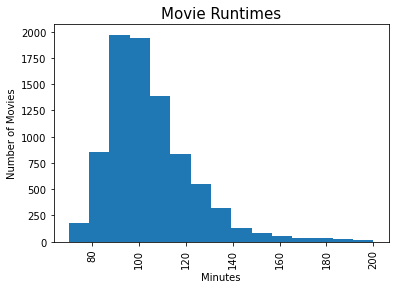

In [57]:
#representing the  result above graphically
plt.hist(df['runtime'], range=(70,200), bins = 15)
plt.title('Movie Runtimes', fontsize = 15)
plt.xlabel('Minutes', fontsize = 10)
plt.ylabel('Number of Movies', fontsize = 10)
plt.xticks(rotation = 90)
plt.show()

Majority of the movies have a mean runtime between 90 to 110 minutes

In [64]:
movies_by_decades = df.copy()
movies_by_decades['release_year'] = ((movies_by_decades['release_year'] // 10 ) *10).astype('int64')

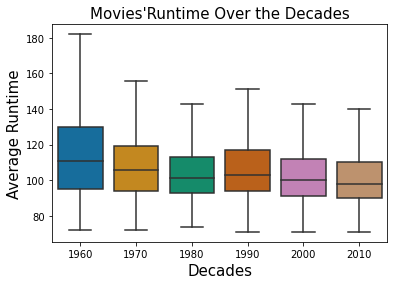

In [65]:
sns.boxplot(x='release_year', y='runtime', data=movies_by_decades, palette = 'colorblind', showfliers=False)
plt.title('Movies\'Runtime Over the Decades', fontsize = 15)
plt.xlabel('Decades', fontsize = 15)
plt.ylabel('Average Runtime', fontsize = 15)
plt.show()

Frome the box plot and histogram above, we can runtime of movies have not increased over the decades.

# Q6. Has the vote count of movies increased over the years?


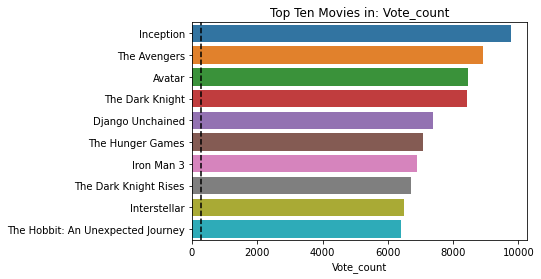

In [67]:
top_ten('vote_count')

From the chart above, inception has the highest vote count followed by the Avengers and Avatar both in second place and third place respectively. This means that although a movie may have a high vote count, the revenue generated may be lower than a movie with a lower vote count as seen above in question 4 where Avatar has the highest revenue

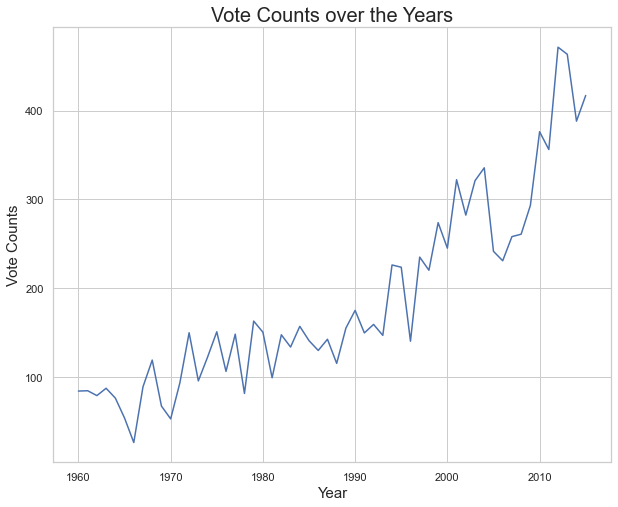

In [68]:
plt.figure(figsize=(10,8))
sns.set(style = 'whitegrid')
x = df.groupby('release_year')['vote_count'].mean()
ax = sns.lineplot(x.index, x)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Vote Counts', fontsize = 15)
plt.title('Vote Counts over the Years', fontsize = 20)
plt.show()

<AxesSubplot:ylabel='Frequency'>

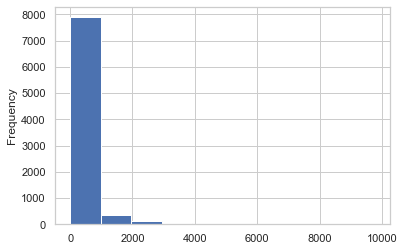

In [70]:
df['vote_count'].plot(kind='hist')

In [ ]:
The vote count when grouped by release year has increased steadily with over 300% increase between 1960 and 2015 

# Conclusion

The data extracted from the CSV file has helped draw the follwoing conclusions:
    
1. 2014 recorded the highest movie release with September as the month with the highest release which goes a long way into determining the best times movies are released.

2. The most popular genres are action, drama, comedy, and thriller and this can help forecast on movies that will remain relevant in the future

3. The correlation help us to know variables that are highly correlated

4. Avatar is the movie with the highest revenue, generating over $3.5 million dollars

5. The average runtime for a movie is 90-110 minutes which has not increased so much over the decades 

6. Vote counts for movies has increased by over 300% over the years

# Limitations

There is no clear correlation between popularity and runtime, vote count and release year, although the lineplot shows above shows that vote count has increased over the years.

# References 


https://medium.com/my-data-camp-journey/investigating-tmdb-movie-datasets-4ee04c263915
https://seaborn.pydata.org/generated/seaborn.countplot.html
https://www.youtube.com/watch?v=DNIbDfrtM1g&t=409s
